
# **Introduction**


One of the challange of Microsoft Azure Hackathon is on the Finance Sector. The challange itself is as follow (quoted from the competition website) :
"banks are trying to figure out which accounts, by industry sector, have the highest probability of turning into ‘Non Performing Loans/Assets’. Banks need this information to take the proper precautions and make capital provisions for defaults to manage adverse impacts on their balance sheet."
Because of this, we decided to create a machine learning model that are able to assess whether the customer is likely to pay back the loan or not.


# **Dataset Information**
This project will be using the dataset that comes from LendingClub, which is a US peer-to-peer lending company. The company is recognized as the world's largest peer-to-peer lending platform. Given historical data from the customer from this company, we will try to create the model that can help a bank that offer lending program to customer, to predict whether the customer will payback the loan or not

# **Dataset Feature**

The dataset have 28 feature with the informations show below:
1. loan_amount = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. Term =  The number of payments on the loan. Values are in months and can be either 36 or 60.
3. 	Int_rate = Interest Rate of the Loan.
4. Installment = The monthly payment owed by the borrower if the loan originates.
5. Grade = The monthly payment owed by the borrower if the loan originates.
6. SubGrade = LC assigned loan subgrade.
7. Emp_title = The job title supplied by the Borrower when applying for the loan.
8. Emp_length = 	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. Home_Ownership = The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.
10. Annual Income = The self-reported annual income provided by the borrower during registration.
11. Verification_Status = Indicates if income was verified by LC, not verified, or if the income source was verified.
12. Issue_D = The month which the loan was funded.
13. Loan_Status = Current status of the loan.
14. Purpose = A category provided by the borrower for the loan request.
15. Title =  	The loan title provided by the borrower.
16. Zip_Code = The first 3 numbers of the zip code provided by the borrower in the loan application.
17. Addr_State = The state provided by the borrower in the loan application.
18. DTI = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
19. Earliest_CR_Line = The month the borrower's earliest reported credit line was opened.
20. Open_Acc = The number of open credit lines in the borrower's credit file.
21. Pub_rec = Number of derogatory public records.
22. Revolving_Bal = Total credit revolving balance.
23. Revol_util =  the amount of credit the borrower is using relative to all available revolving credit.
24. Total_acc = The total number of credit lines currently in the borrower's credit file.
25. Inital_Llist = The initial listing status of the loan. Possible values are – W, F.
26. Application_Type = Indicates whether the loan is an individual application or a joint application with two co-borrowers.
27. Mort_Acc = Nnumber of Mortgage Accounts.
28. Pub_Rec_Bankrupt Number of public record bankruptcies.

# **Data Processing**

In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
#reading the data
df1 = pd.read_csv('/drive/My Drive/Lending_Club_Loan.csv')

In [3]:
#checking the info of the available feature
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
#Preview of the data
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# **Exploratory Data Analysis**

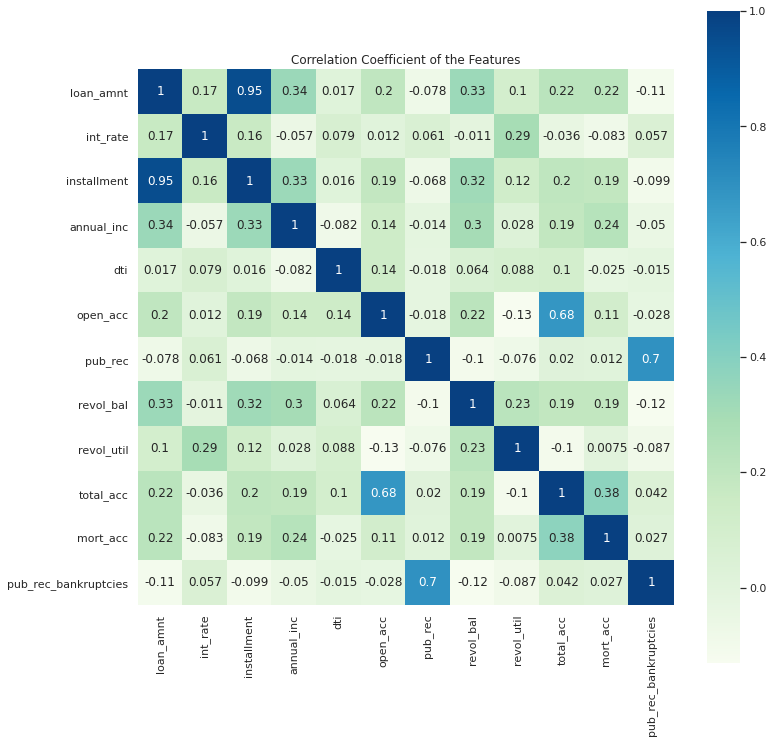

In [5]:
#checking correlation
import seaborn as sns
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Correlation Coefficient of the Features')
sns.heatmap(df1.corr(),square=True,cmap='GnBu',linecolor='w',annot=True)

We use Pearson Correlation method to determine the correlation between each features in dataset. Correlation value range from -1 to +1, 1 show perfect linear relationship, while the 0 show no relationship for the feature. The highest correlation is 0.95 between the amount of Loan and the Installment

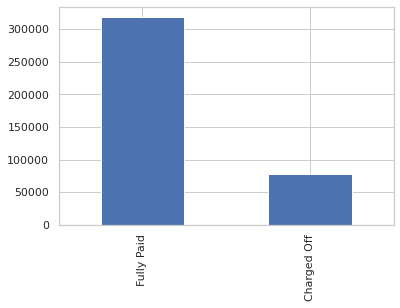

In [6]:
#checking the distribution of the loan that borrowed by the customer
df1['loan_status'].value_counts().plot(kind='bar')

This is normal case in classification, which is imbalance dataset. It is reasonal if we expect that the customer that fully paid the loans is more higher than the customer that didn't paid their loans.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


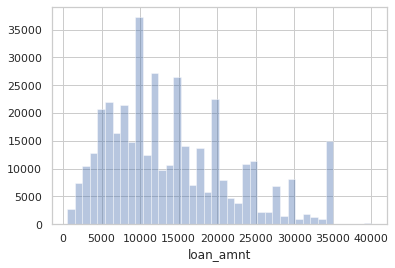

In [7]:
#checking the amount of Loans from the customer.
sns.distplot(df1['loan_amnt'],kde=False,bins=40)

The highest loans is around 10k-15k USD, which mean that is the standard amount of Loans from a customer.

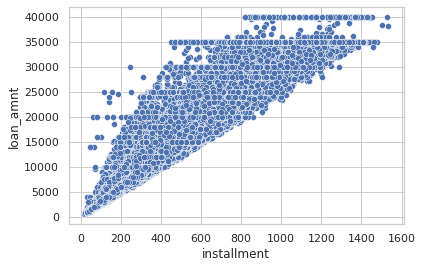

In [8]:
#checking the highest correlation feature (loan_amount-installment)
sns.scatterplot(x='installment',y='loan_amnt',data=df1)

It can be see from the scatterplot that those 2 feature is having linear-like distribution (which proven the correlation reaching nearly 1).

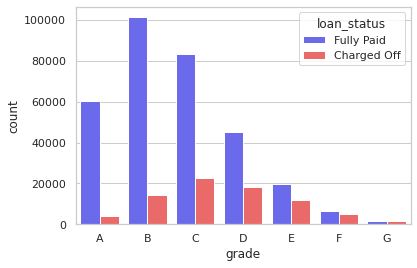

In [9]:
#countplot the grade and the output
sns.countplot(x='grade', hue='loan_status', data=df1, order=sorted(df1['grade'].unique()), palette='seismic')

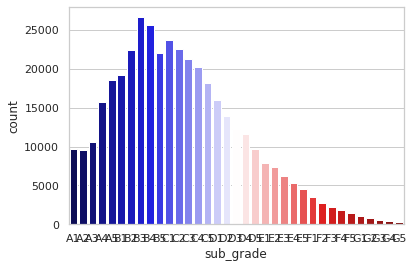

In [10]:
sns.countplot(x='sub_grade', data=df1, palette='seismic', order=sorted(df1['sub_grade'].unique()))

There are 2 feature which grade and sub-grade that comes from LC. From this feature we can conclude that if the grade is higher, the amount of customer that charged off is more increased.

In [11]:
#converting the target
df1['loan_status'] = df1['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
df1['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

# **Data Preprocessing**

# **Imputing Missing Value**

In [12]:
#checking the missing value
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

6 features have missing values.

In [13]:
#checking the first two missing value, emp title and emp length
print(df1['emp_title'].nunique())
df1['emp_title'].value_counts()

173105


Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Team Relations                                 1
corectional officer                            1
wedgwood garden center                         1
mechanic  " A "                                1
Supervisor Property Management Specialis       1
Name: emp_title, Length: 173105, dtype: int64

these 2 feature are related, but they are not giving the importance with the loan status, reflected by the amount of unique title employment, and that is why we choose to drop this 2 feature.

In [14]:
df1.drop(columns=['emp_title','emp_length'],axis=1,inplace=True)

In [15]:
#we will analyze the next feature, which is title. Judging by the sample of data we saw, the title and purpose is really similiar
df1[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


Title is simply substring or short explanation from purpose, and that is why we choose to drop this feature.

In [16]:
df1.drop(columns=['title'],axis=1,inplace=True)

In [17]:
#the next feature that will be procesed is mort_acc, judging from the previous correlation feature, total_acc having pretty high correlation with mort_acc.
#we will try to imputing the missing value from mort_acc based on the mean value corresponding with total_acc_value.
total_acc_avg = df1.groupby('total_acc').mean()['mort_acc']
def fill_missing_mort(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc
df1['mort_acc'] = df1.apply(lambda x: fill_missing_mort(x['total_acc'],x['mort_acc']),axis=1)


In [18]:
#the next 2 missing value is only less than 1% of the data, which mean we will drop the missing value.
df1 = df1.dropna()

In [19]:
#checking missing value again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  int64  
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

# **Categorical Feature**

In [20]:
#term feature
df1['term'] = df1['term'].apply(lambda term: int(term[:3]))
df1['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [21]:
#grade and subgrade
#from the previous plotting, we conclude that subgrade is more detailed than the grade, that's why we will drop the grade feature
df1.drop(columns=['grade'],axis=1,inplace=True)

In [22]:
#home ownership feature
df1['home_ownership'] = df1['home_ownership'].replace(['NONE','ANY'],'OTHER')
df1['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [23]:
#Address Feature
df1['zip_code'] = df1['address'].apply(lambda address:address[-5:])
df1.drop(columns=['address'],axis=1,inplace=True)

In [24]:
#dropping issued feature and earliest cr line
df1.drop(columns=['issue_d','earliest_cr_line'],axis=1,inplace=True)

In [25]:
#transforming feature
from sklearn.preprocessing import OneHotEncoder
df1 = df1.reset_index()
obj_data = df1.select_dtypes(include=['object']).copy()
categorical_cols = obj_data.columns
one_hot_encode = OneHotEncoder(handle_unknown='ignore', sparse = False)
one_hot_encode.fit(df1[categorical_cols])
new_categorical_feature = one_hot_encode.transform(df1[categorical_cols])
categorical_frame = pd.DataFrame(new_categorical_feature, columns = one_hot_encode.get_feature_names(input_features = categorical_cols))
df_new = pd.concat([df1,categorical_frame],axis=1).drop(columns=categorical_cols,axis=1)

In [26]:
#creating the feature and output
Y = df_new['loan_status']
X = df_new.drop(columns=['loan_status','index'],axis=1)

# **Splitting And Modelling**

In [27]:
#splitting and normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [59]:
#Modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [60]:
model = Sequential()

# input layer
model.add(Dense(84,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

weights = {0:1,1:4}

In [61]:
model.fit(x=X_train1, 
          y=y_train, 
          epochs=400,
          verbose = 2,
          batch_size=256,
          class_weight=weights,
          validation_data=(X_test1, y_test),
          callbacks=[early_stop])

Epoch 1/400
1236/1236 - 4s - loss: 0.4853 - val_loss: 0.3121
Epoch 2/400
1236/1236 - 3s - loss: 0.4174 - val_loss: 0.3215
Epoch 3/400
1236/1236 - 3s - loss: 0.4120 - val_loss: 0.3180
Epoch 4/400
1236/1236 - 3s - loss: 0.4087 - val_loss: 0.3223
Epoch 5/400
1236/1236 - 3s - loss: 0.4059 - val_loss: 0.3179
Epoch 6/400
1236/1236 - 3s - loss: 0.4044 - val_loss: 0.3211
Epoch 7/400
1236/1236 - 3s - loss: 0.4031 - val_loss: 0.3324
Epoch 8/400
1236/1236 - 3s - loss: 0.4022 - val_loss: 0.3193
Epoch 9/400
1236/1236 - 3s - loss: 0.4013 - val_loss: 0.3240
Epoch 10/400
1236/1236 - 3s - loss: 0.4005 - val_loss: 0.3190
Epoch 11/400
1236/1236 - 3s - loss: 0.4002 - val_loss: 0.3181
Epoch 12/400
1236/1236 - 3s - loss: 0.3993 - val_loss: 0.3316
Epoch 13/400
1236/1236 - 3s - loss: 0.3989 - val_loss: 0.3187
Epoch 14/400
1236/1236 - 3s - loss: 0.3989 - val_loss: 0.3168
Epoch 15/400
1236/1236 - 3s - loss: 0.3982 - val_loss: 0.3160
Epoch 16/400
1236/1236 - 3s - loss: 0.3979 - val_loss: 0.3232
Epoch 17/400
1236

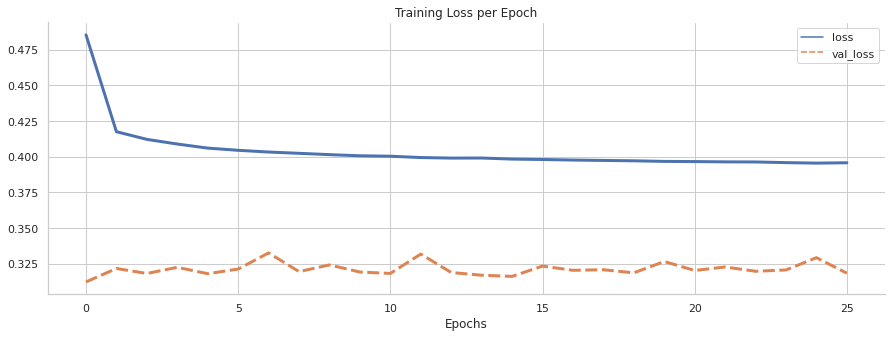

In [62]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [63]:
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(X_test1)
print('Classification Report:')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15582
           1       0.88      1.00      0.93     63462

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confusion Matrix:
[[ 6730  8852]
 [    4 63458]]


In [64]:
data_test = df1.tail(1).drop(columns='loan_status',axis=1).reset_index(drop=True)
data_test.drop(columns=['index'],axis=1,inplace=True)
data_test['sub_grade'] = '0'
categorical_test = one_hot_encode.transform(data_test[categorical_cols])
categorical_test_frame = pd.DataFrame(categorical_test, columns = one_hot_encode.get_feature_names(input_features = categorical_cols))
data_test_new = pd.concat([data_test, categorical_test_frame], axis=1).drop(columns = categorical_cols, axis=1)

In [65]:
model.predict(data_test_new)

array([[1.]], dtype=float32)

In [39]:
!pip install onnxmltools
!pip install onnxruntime
!pip install tf2onnx

     |████████████████████████████████| 348kB 11.2MB/s 


In [66]:
model.save('/drive/My Drive/model')

INFO:tensorflow:Assets written to: /drive/My Drive/model/assets


In [67]:
!python -m tf2onnx.convert --saved-model '/drive/My Drive/model' --output '/drive/My Drive/model.onnx'

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-03-31 10:40:25,004 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2021-03-31 10:40:25,620 - INFO - Signatures found in model: [serving_default].
2021-03-31 10:40:25,620 - WARNING - '--signature_def' not specified, using first signature: serving_default
2021-03-31 10:40:25,620 - INFO - Output names: ['dense_11']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2021-03-31 10:40:25,692 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:557: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2021-03-31 10:40:25,713 - INFO - Using te

In [74]:
data_test = df1.tail(1).drop(columns='loan_status',axis=1).reset_index(drop=True)
data_test.drop(columns=['index'],axis=1,inplace=True)
data_test['sub_grade'] = '0'
categorical_test = one_hot_encode.transform(data_test[categorical_cols])
categorical_test_frame = pd.DataFrame(categorical_test, columns = one_hot_encode.get_feature_names(input_features = categorical_cols))
data_test_new = pd.concat([data_test, categorical_test_frame], axis=1).drop(columns = categorical_cols, axis=1)

In [86]:
data_test = np.array(data_test_new)
data_test1 = data_test.astype(np.float32)

In [71]:
import onnxruntime
session = onnxruntime.InferenceSession('/drive/My Drive/model.onnx')

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(input_name)
print(output_name)

dense_8_input:0
dense_11


In [88]:
results = session.run([output_name], {input_name: data_test1})

In [103]:
import requests
import json
input_data = json.dumps({"data": data_test1.tolist()})
scoring_uri1 = 'http://e3269d5d-018b-4ce0-a2d7-32f445789165.westeurope.azurecontainer.io/score'
headers = {'Content-Type':'application/json'}

resp = requests.post(scoring_uri1, input_data, headers=headers)

print("POST to url", scoring_uri1)

result = json.loads(resp.text)['result']

print("The Decision Regarding The Loan Is:",result)

POST to url http://e3269d5d-018b-4ce0-a2d7-32f445789165.westeurope.azurecontainer.io/score
The Decision Regarding The Loan Is: [[1.0]]
